# To predict the laon status ,as approved or not approved, based on the customer details - Binary classification problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [115]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [116]:
train_original=train.copy()
test_original=test.copy()

In [117]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [118]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [119]:
train.shape,test.shape

((614, 13), (367, 12))

In [120]:
train.dtypes #object datatype means categorical variables

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [121]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [122]:
# Replacing with numerical varaiables

train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

In [123]:
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

In [124]:
#To find correlation between numerical features
cor=train.corr()

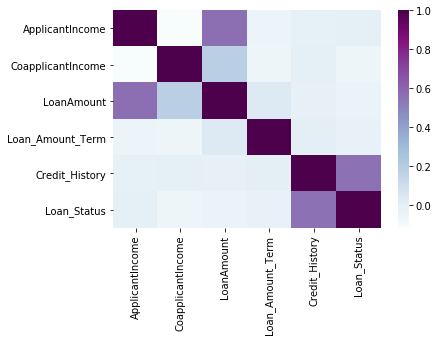

In [125]:
sns.heatmap(cor,cmap="BuPu") # high correlation between applicantincome & loan amount  Also credit history & loan status

In [126]:
# Missing value imputation
#For numerical variables: imputation using mean or median
#For categorical variables: imputation using mode

In [127]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [128]:
# categorical missing values in :-  Gender,Married,dependents,selfemployed
# Numerical missing values in :- Loanamount,loan amount term,credit history
#Gender, Married, Dependents, Credit_History and Self_Employed

In [129]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [130]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [131]:
train.isnull().sum() # all missing values (Nan) are imputed

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [132]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [133]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

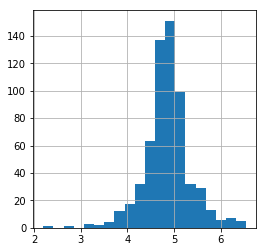

In [134]:
# outlier treatment
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20,figsize=(4,4))

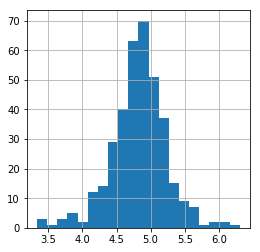

In [135]:
test['LoanAmount_log']=np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20,figsize=(4,4))

In [136]:
#Model Building

In [137]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [138]:
type(train)

pandas.core.frame.DataFrame

In [139]:
# dummifying categorical variables, label encoding or one hot encoding can be used
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [140]:
train.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,4.85203,1,0,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.85203,0,1,0,...,0,1,0,1,0,1,0,1,0,0


In [141]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'Loan_ID_LP001002', 'Loan_ID_LP001003', 'Loan_ID_LP001005',
       ...
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object', length=636)

In [142]:
test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log',
       'Loan_ID_LP001015', 'Loan_ID_LP001022', 'Loan_ID_LP001031',
       'Loan_ID_LP001035',
       ...
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object', length=388)

In [143]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [144]:
def classification(model,data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    #make predictions
    predictions=model.predict(data[predictors])
    #return predictions
    #to check accuracy
    accuracy=accuracy_score(predictions,data[outcome])
    print("Accuracy score is {}".format(accuracy))

In [145]:
outcome_var='Loan_Status'

#Logistic Regression
#predictor_var=['Credit_History']

#model = LogisticRegression()
#predictions=classification(model,train, predictor_var, outcome_var)


In [146]:
#Logistic Regression
#predictor_var=['Credit_History','LoanAmount_log']

#model = LogisticRegression()
#classification(model,train, predictor_var, outcome_var)

In [149]:
#Logistic Regression
#predictor_var=['Credit_History','LoanAmount_log','Loan_Amount_Term','Education_Graduate','Gender_Male',
                 #'Gender_Female','ApplicantIncome']

#model = LogisticRegression()
#classification(model,train, predictor_var, outcome_var)


In [150]:
#model = DecisionTreeClassifier()
#predictor_var = ['Credit_History']
#classification(model, train,predictor_var,outcome_var)

In [154]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','LoanAmount_log','Loan_Amount_Term','Education_Graduate','Gender_Male',
                 'ApplicantIncome']
classification(model, train,predictor_var,outcome_var)

Accuracy score is 1.0


In [155]:
test=test[predictor_var]

In [156]:
pred_test = model.predict(test)

In [157]:
#submission

In [158]:
submission=pd.read_csv("sample_submission.csv")

In [159]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [160]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [161]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')